<a href="https://colab.research.google.com/github/salsabilar311/Predictive-Analytics_Water-Quality/blob/main/Water_Quality_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/salsabilar311/Predictive-Analytics_Water-Quality/main/water_potability.csv?token=GHSAT0AAAAAACNPNJMRA3BYNUHZZAJ7SZ3IZN7GFGA')
df

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


**Remove Missing Value**

In [3]:
df = df.dropna()

**Remove Outlier**

In [4]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3-Q1
df = df[~((df<(Q1-1.5*IQR))|(df>(Q3+1.5*IQR))).any(axis=1)]

df

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
6,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,0
7,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0
...,...,...,...,...,...,...,...,...,...,...
3264,5.893103,239.269481,20526.666156,6.349561,341.256362,403.617560,18.963707,63.846319,4.390702,1
3265,8.197353,203.105091,27701.794055,6.472914,328.886838,444.612724,14.250875,62.906205,3.361833,1
3267,8.989900,215.047358,15921.412018,6.297312,312.931022,390.410231,9.899115,55.069304,4.613843,1
3268,6.702547,207.321086,17246.920347,7.708117,304.510230,329.266002,16.217303,28.878601,3.442983,1


**View feature correlation with potability**

Text(0.5, 1.0, 'Correlation Matrix untuk Fitur Numerik')

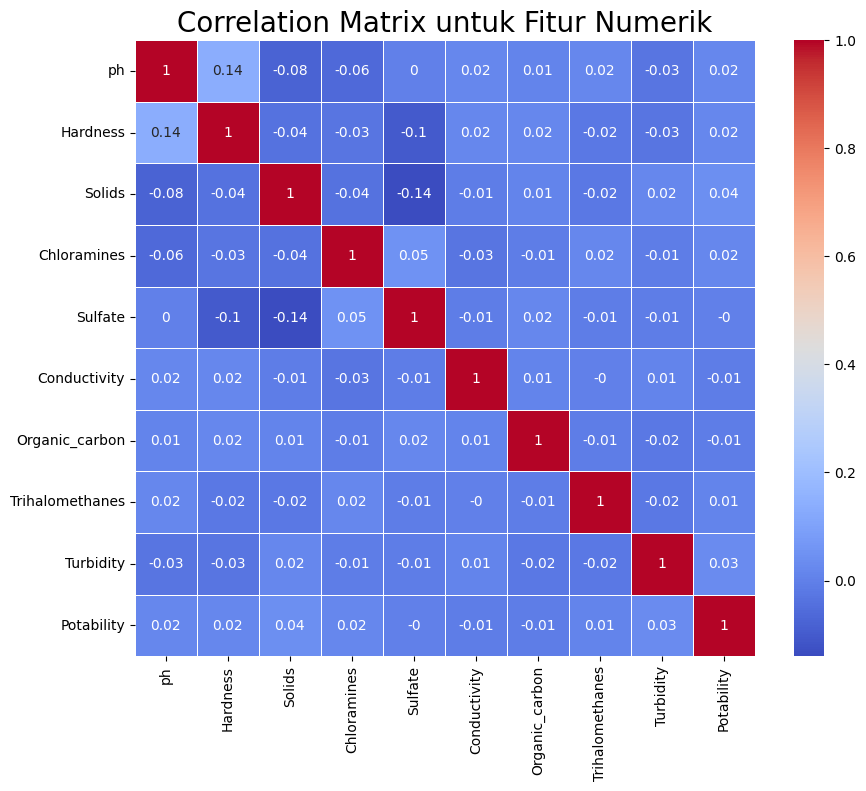

In [5]:
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr().round(2)

sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, )
plt.title("Correlation Matrix untuk Fitur Numerik", size=20)

**Split Data**

In [6]:
X = df.drop(["Potability"],axis =1)
y = df["Potability"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123)

print('X_train shape:', X_train.shape)
print('y_train shape:', y_train.shape)
print('X_test shape:', X_test.shape)
print('y_test shape:', y_test.shape)

X_train shape: (1435, 9)
y_train shape: (1435,)
X_test shape: (359, 9)
y_test shape: (359,)


**Normalized X_train**

In [7]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_train

array([[ 8.68526913e-01,  1.68522180e+00, -1.66761565e+00, ...,
        -1.08730214e-01,  1.20339065e+00,  5.68929887e-01],
       [-1.10396083e-01, -1.38228341e+00, -4.18678956e-01, ...,
         1.21069974e+00, -6.84232540e-01, -1.79704966e+00],
       [-1.60617224e+00, -4.44674155e-04, -2.67889825e-01, ...,
        -3.35563919e-01,  1.19329697e+00,  5.34160133e-01],
       ...,
       [ 1.02068843e+00,  1.07043960e+00,  7.47625588e-01, ...,
        -5.69895342e-01,  9.09300293e-01,  8.17030032e-01],
       [ 1.40434225e+00,  6.69066222e-01, -8.93640405e-01, ...,
        -1.13639640e+00,  1.94399035e-01, -7.10761787e-01],
       [-1.28801324e+00, -1.50659141e+00,  4.29086805e-01, ...,
        -5.75308870e-01, -9.34915343e-01, -3.70112702e-01]])

**K-Nearest Neighbor**

In [8]:
# Metode KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7).fit(X_train, y_train.values)

# Memprediksi hasil Test Set
y_pred_KNN = knn.predict(X_test.values)

# Membuat Confusion Matrix
from sklearn.metrics import confusion_matrix
cm_KNN = confusion_matrix(y_test.values, y_pred_KNN)

# Menghitung nilai akurasi dari klasifikasi naive bayes
from sklearn.metrics import classification_report
print(classification_report(y_test.values, y_pred_KNN, zero_division=1))

knn = []

accuracy = ((cm_KNN[0][0]+cm_KNN[1][1])/(cm_KNN[0][0]+cm_KNN[1][1]+cm_KNN[0][1]+cm_KNN[1][0]))*100
precision = (cm_KNN[0][0]/(cm_KNN[0][0]+cm_KNN[1][0]))*100
recall = (cm_KNN[0][0]/(cm_KNN[0][0]+cm_KNN[0][1]))*100
f1 = ((2*precision*recall)/(precision+recall))

knn.append(accuracy)
knn.append(precision)
knn.append(recall)
knn.append(f1)

knn = np.array(knn) # ubah list jadi numpy array
print(knn)

              precision    recall  f1-score   support

           0       0.58      0.95      0.72       212
           1       0.15      0.01      0.03       147

    accuracy                           0.57       359
   macro avg       0.37      0.48      0.37       359
weighted avg       0.41      0.57      0.44       359

[56.545961   58.09248555 94.81132075 72.04301075]


**Random Forest**

In [9]:
# Metode Random Forest
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train.values)

# Memprediksi hasil Test Set
y_pred_rfc = rfc.predict(X_test.values)

# Membuat Confusion Matrix
from sklearn.metrics import confusion_matrix
cm_rfc = confusion_matrix(y_test.values, y_pred_rfc)

# Menghitung nilai akurasi dari klasifikasi naive bayes
from sklearn.metrics import classification_report
print(classification_report(y_test.values, y_pred_rfc, zero_division=1))

rfc = []

accuracy = ((cm_rfc[0][0]+cm_rfc[1][1])/(cm_rfc[0][0]+cm_rfc[1][1]+cm_rfc[0][1]+cm_rfc[1][0]))*100
precision = (cm_rfc[0][0]/(cm_rfc[0][0]+cm_rfc[1][0]))*100
recall = (cm_rfc[0][0]/(cm_rfc[0][0]+cm_rfc[0][1]))*100
f1 = ((2*precision*recall)/(precision+recall))

rfc.append(accuracy)
rfc.append(precision)
rfc.append(recall)
rfc.append(f1)

rfc = np.array(rfc)
print(rfc)

              precision    recall  f1-score   support

           0       0.59      1.00      0.74       212
           1       1.00      0.00      0.00       147

    accuracy                           0.59       359
   macro avg       0.80      0.50      0.37       359
weighted avg       0.76      0.59      0.44       359

[ 59.05292479  59.05292479 100.          74.25569177]


**Naive Bayes**

In [32]:
# Metode Naive Bayes
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train.values)

# Memprediksi hasil Test Set
y_pred_gnb = gnb.predict(X_test.values)

# Membuat Confusion Matrix
from sklearn.metrics import confusion_matrix
cm_gnb = confusion_matrix(y_test.values, y_pred_gnb)

# Menghitung nilai akurasi dari klasifikasi naive bayes
from sklearn.metrics import classification_report
print(classification_report(y_test.values, y_pred_gnb, zero_division=1))

gnb = []

accuracy = ((cm_gnb[0][0]+cm_gnb[1][1])/(cm_gnb[0][0]+cm_gnb[1][1]+cm_gnb[0][1]+cm_gnb[1][0]))*100
precision = (cm_gnb[0][0]/(cm_gnb[0][0]+cm_gnb[1][0]))*100
recall = (cm_gnb[0][0]/(cm_gnb[0][0]+cm_gnb[0][1]))*100
f1 = ((2*precision*recall)/(precision+recall))

gnb.append(accuracy)
gnb.append(precision)
gnb.append(recall)
gnb.append(f1)

gnb = np.array(gnb)
print(gnb)

              precision    recall  f1-score   support

           0       1.00      0.00      0.00       212
           1       0.41      1.00      0.58       147

    accuracy                           0.41       359
   macro avg       0.70      0.50      0.29       359
weighted avg       0.76      0.41      0.24       359

[40.94707521         nan  0.                 nan]


<ipython-input-32-007bde526f3e>:20: RuntimeWarning: invalid value encountered in long_scalars
  precision = (cm_gnb[0][0]/(cm_gnb[0][0]+cm_gnb[1][0]))*100


**Model Evaluation**

In [33]:
score = ['Accuracy', 'Precision', 'Recall', 'F1', 'Accuracy', 'Precision', 'Recall', 'F1', 'Accuracy', 'Precision', 'Recall', 'F1']
model = ["KNN","KNN","KNN","KNN", "RFC","RFC","RFC","RFC", "GNB","GNB","GNB","GNB"]
nilai = np.concatenate((knn, rfc, gnb))
kolom = ['Model', 'Metrics', 'Score']
data = [model, score, nilai]
df_model = pd.DataFrame(dict(zip(kolom, data)))

df_model = df_model.set_index(['Model', 'Metrics'])
display(df_model)

Score
Model Metrics              
KNN   Accuracy    56.545961
      Precision   58.092486
      Recall      94.811321
      F1          72.043011
RFC   Accuracy    59.052925
      Precision   59.052925
      Recall     100.000000
      F1          74.255692
GNB   Accuracy    40.947075
      Precision         NaN
      Recall       0.000000
      F1                NaN

# Conclusion
Random forest adalah algoritma yang memiliki akurasi yang tertinggi dari ketiga model. Dengan nilai akurasi **0.59**. Oleh karena itu untuk memprediksi kualitas air akan digunakan Random Forest sebagai model machine learning.